### Decision Tree

We start our exploration of a meta-model with a decision tree. This is ideal because a decision tree ranks very highly when it comes to explainability, so we should be able to derive some insights as to what relations are being found within the data.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 45693
np.random.seed(SEED)

data = pd.read_csv('metaset.csv')

In [22]:
data

,dataset,datapoints,feats,numeric,avg_corr,n_binary,num_to_cat_ratio,classes,majority_fraction,best_classifier
0,anemia,0.016480,0.269565,0.137931,0.081748,0.333333,0.108108,4.0,0.386235,3.0
1,aus_rain,0.098939,1.000000,0.551724,0.286451,1.000000,0.146789,2.0,0.779741,0.0
2,campusrecruitment,0.000065,0.104348,0.172414,0.357938,0.148148,0.294118,2.0,0.688372,0.0
3,employability,0.001145,0.008696,0.000000,0.000000,0.092593,0.000000,2.0,0.687575,2.0
4,fraud,1.000000,0.173913,1.000000,0.236221,0.000000,29.000000,2.0,0.500000,4.0
5,loan,0.008483,0.052174,0.241379,0.145074,0.074074,0.777778,2.0,0.706000,3.0
6,mobile_price,0.003205,0.147826,0.482759,0.034483,0.111111,1.076923,4.0,0.250000,0.0
7,stress,0.001622,0.104348,0.655172,0.568837,0.018519,6.333333,3.0,0.339091,3.0
8,student_testprep,0.001446,0.078261,0.103448,0.850244,0.138889,0.187500,2.0,0.656000,0.0
9,titanic,0.001251,0.026087,0.137931,0.194706,0.074074,0.444444,2.0,0.617548,2.0


In [23]:
X = data.iloc[:, 1:-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

X[0], y[0]

(array([0.01647984, 0.26956522, 0.13793103, 0.08174796, 0.33333333,
        0.10810811, 4.        , 0.38623507]),
 3.0)

In [79]:
from sklearn.model_selection import train_test_split

XTr, XTe, yTr, yTe = train_test_split(X, y, test_size=0.3, random_state=SEED)
XTe.shape

(4, 8)

In [212]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=SEED)

clf.fit(X, y)

DecisionTreeClassifier(random_state=45693)

feature names: datapoints, feats, numeric, avg_corr, n_binary, num_to_cat_ratio, classes, majority_fraction


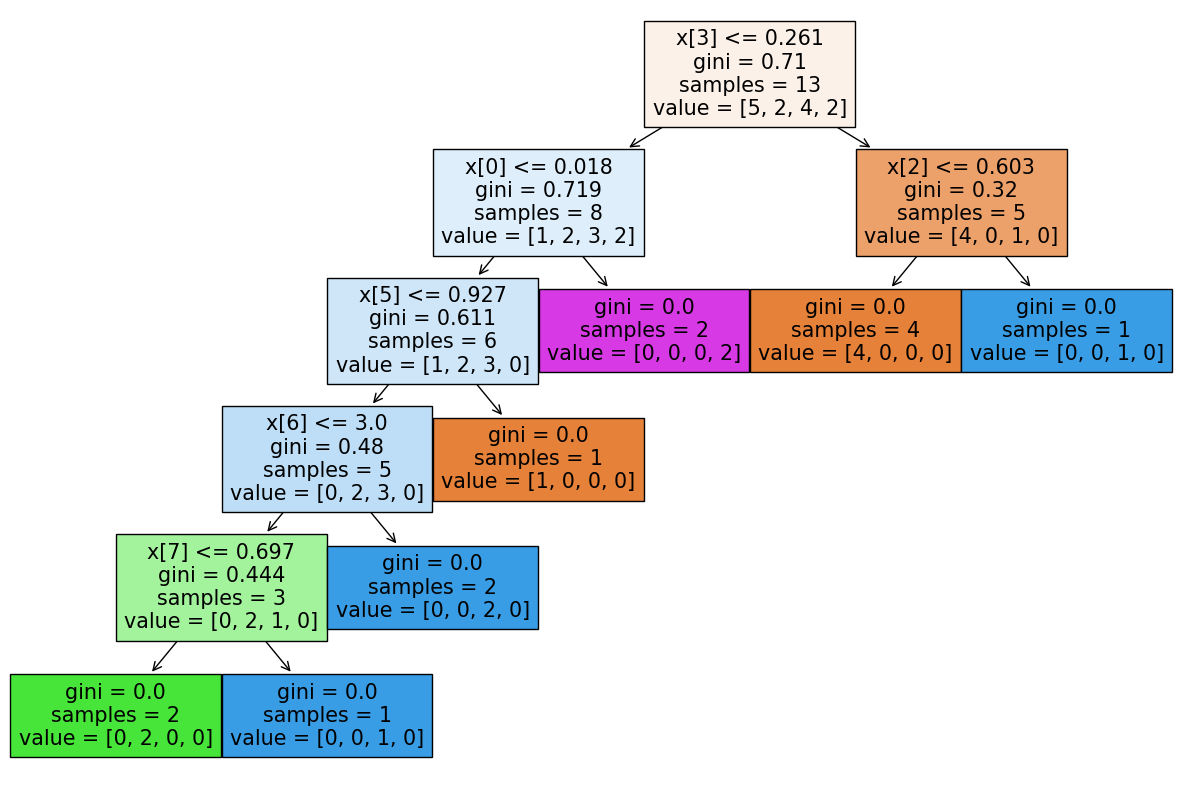

In [213]:
from sklearn import tree

print(f"feature names: {', '.join(list(data.columns[1:-1]))}")

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()


In [82]:
from sklearn.metrics import accuracy_score


yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")

training accuracy: 1.0

test examples: [2. 3. 0. 2.]
test accuracy: 1.0


The small dataset already causes overfitting (too little info to generalise). Paired with the unrestricted max_depth of the tree, the current model likely overfits its training data. However, the fact that it generalises to have 100% accuracy on the unseen datapoints as well is promising, since it suggests the existence of some general pattern in the data. Though it is too early to say anything without cross validation.

But before that, we try varying the $\verb|max_depth|$ and see what we get.

### Varying Max Depth

In [ ]:
np.random.seed(SEED)

$\verb|max_depth| = 1$

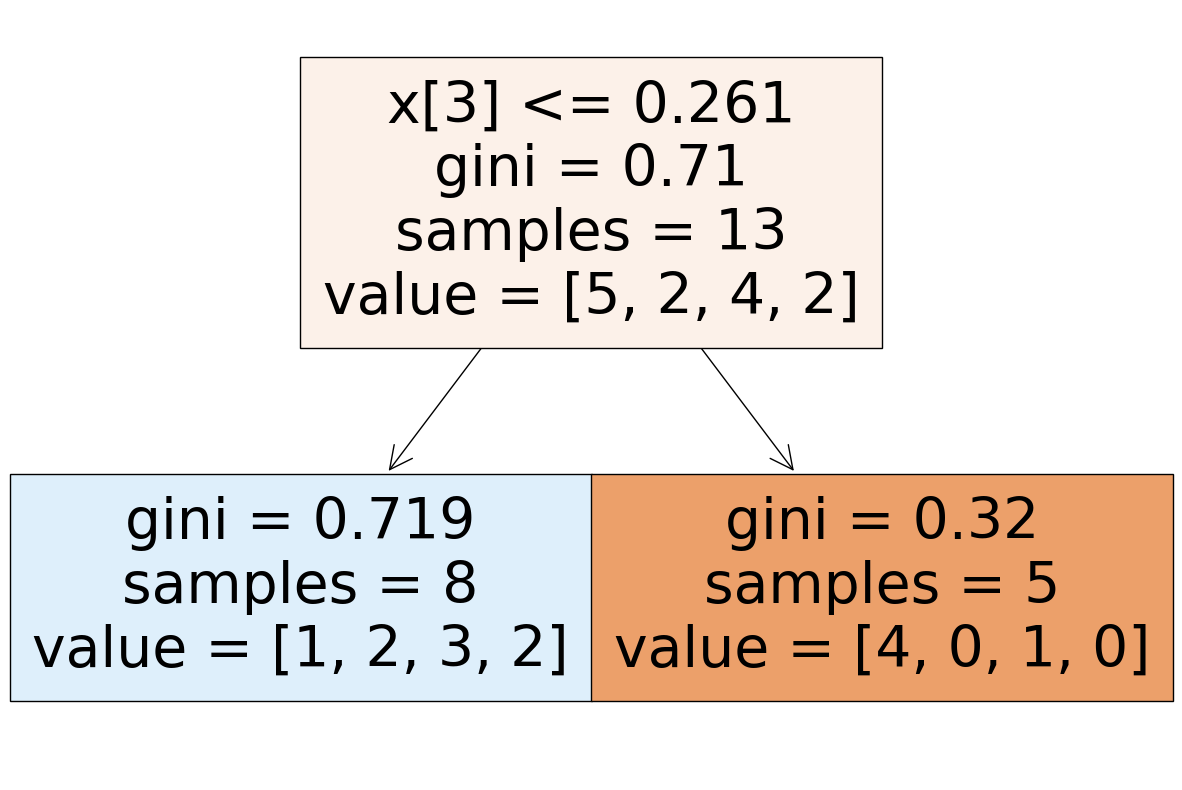

training accuracy: 0.5555555555555556

test examples: [2. 3. 0. 2.]
test accuracy: 0.5


In [86]:
clf = DecisionTreeClassifier(random_state=np.random.randint(1000), max_depth=1)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")


Low training accuracy (though better than guessing, 4 classes exist) => underfitting the data

$\verb|max_depth| = 2$

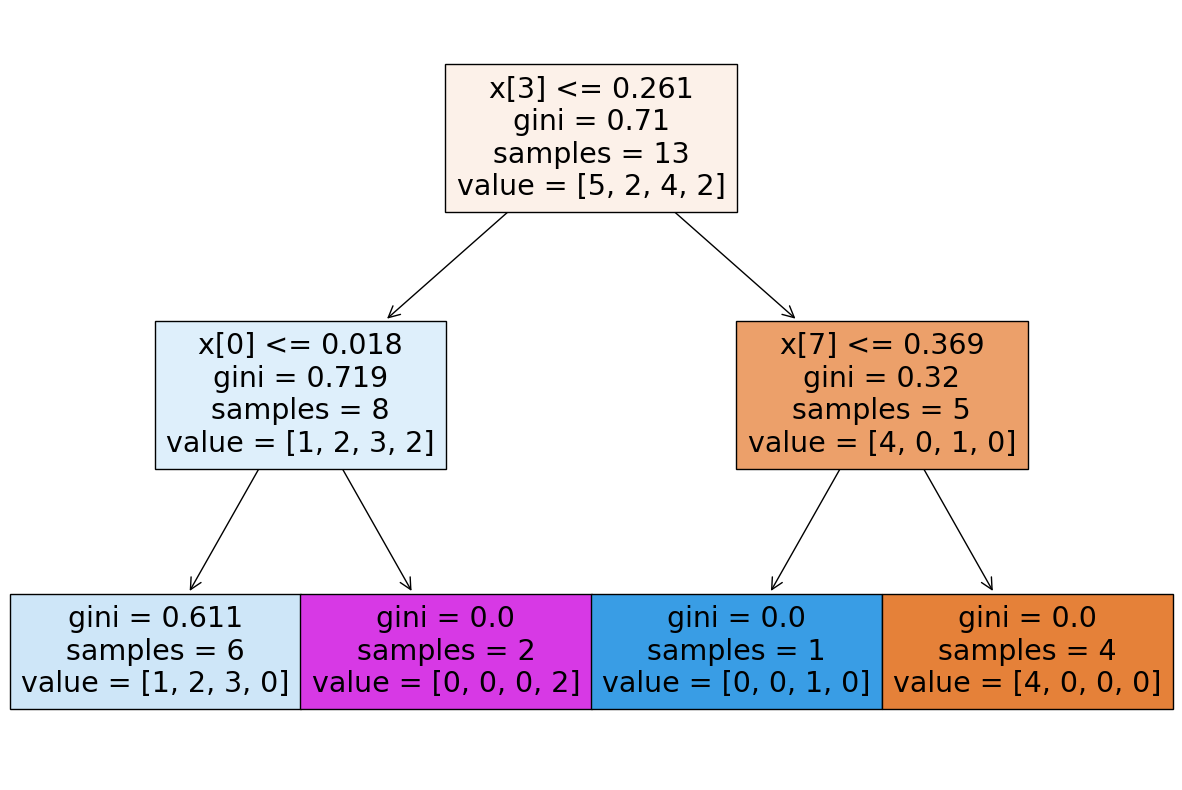

training accuracy: 0.8888888888888888

test examples: [2. 3. 0. 2.]
test accuracy: 0.5


In [87]:
clf = DecisionTreeClassifier(random_state=np.random.randint(1000), max_depth=2)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")


The training data is fit somewhat well, but generalises poorly to test data, implying some overfitting (perhaps due to the low number of data points).

$\verb|max_depth| = 3$

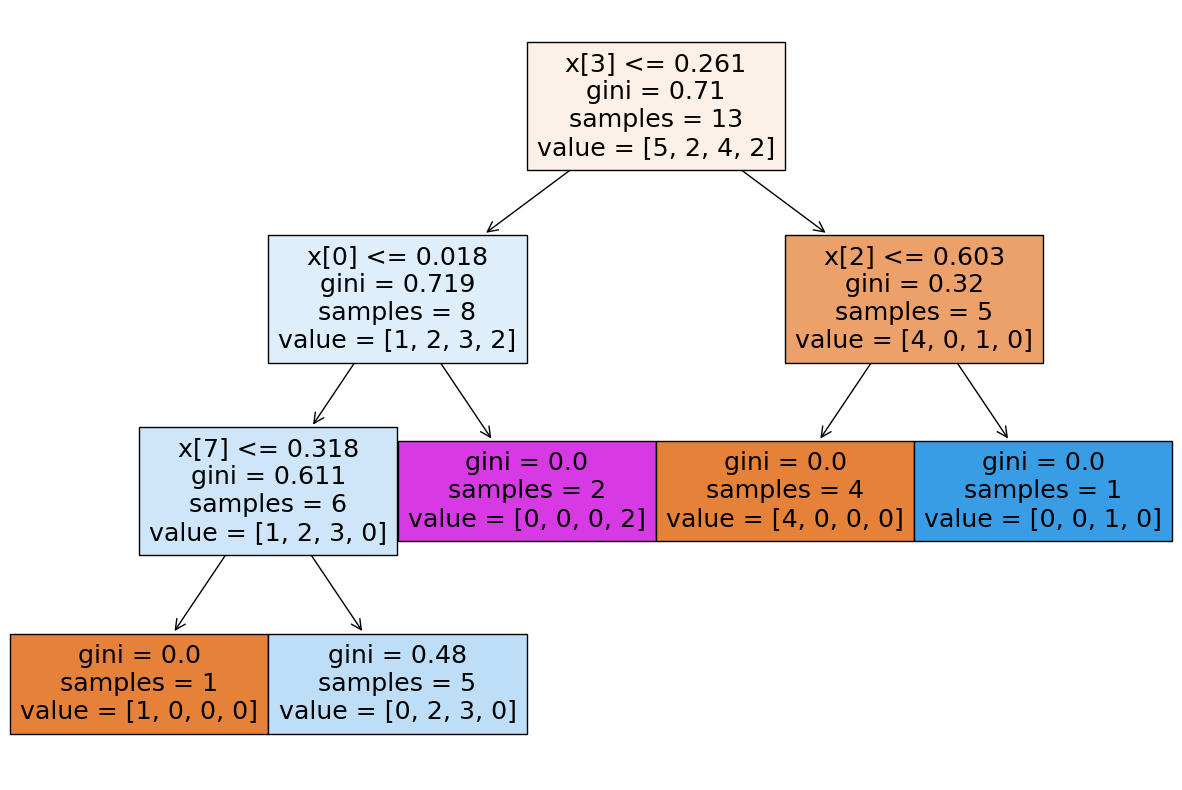

training accuracy: 1.0

test examples: [2. 3. 0. 2.]
test accuracy: 0.5


In [88]:
clf = DecisionTreeClassifier(random_state=np.random.randint(1000), max_depth=3)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")


Due to low test accuracy, this is most certainly overfitting.

$\verb|max_depth| = 4$

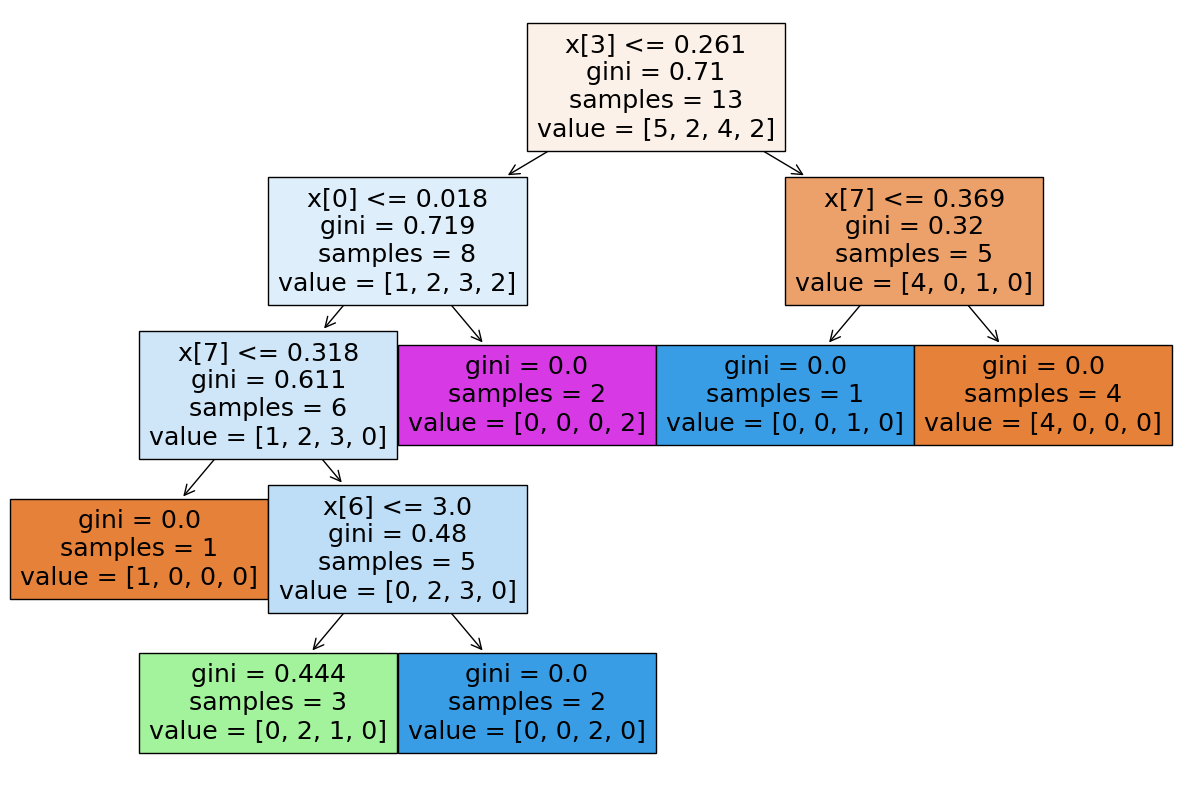

training accuracy: 0.8888888888888888

test examples: [2. 3. 0. 2.]
test accuracy: 1.0


In [91]:
clf = DecisionTreeClassifier(random_state=np.random.randint(1000), max_depth=4)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")


This is quite interesting, the training data is somewhat underfit, but the model is generalising well to the test data. The above tests all seem to suggest that a depth of at least 3-4 is required to effectively capture the underlying relation in the dataset, and we are not at a huge risk of overfitting at these depth. We will verify this systematically with cross-validation, but for now, for the sake of completeness, we look at the cases of $\verb|max_depth| = 5, 6, 10$.

It is important to note that so far, all of these examples are using the same test set, and the model may silently be overfitting the training data, and is just lucky that the same overfit applies to the test set as well, this will only be clarified during cross-validation.

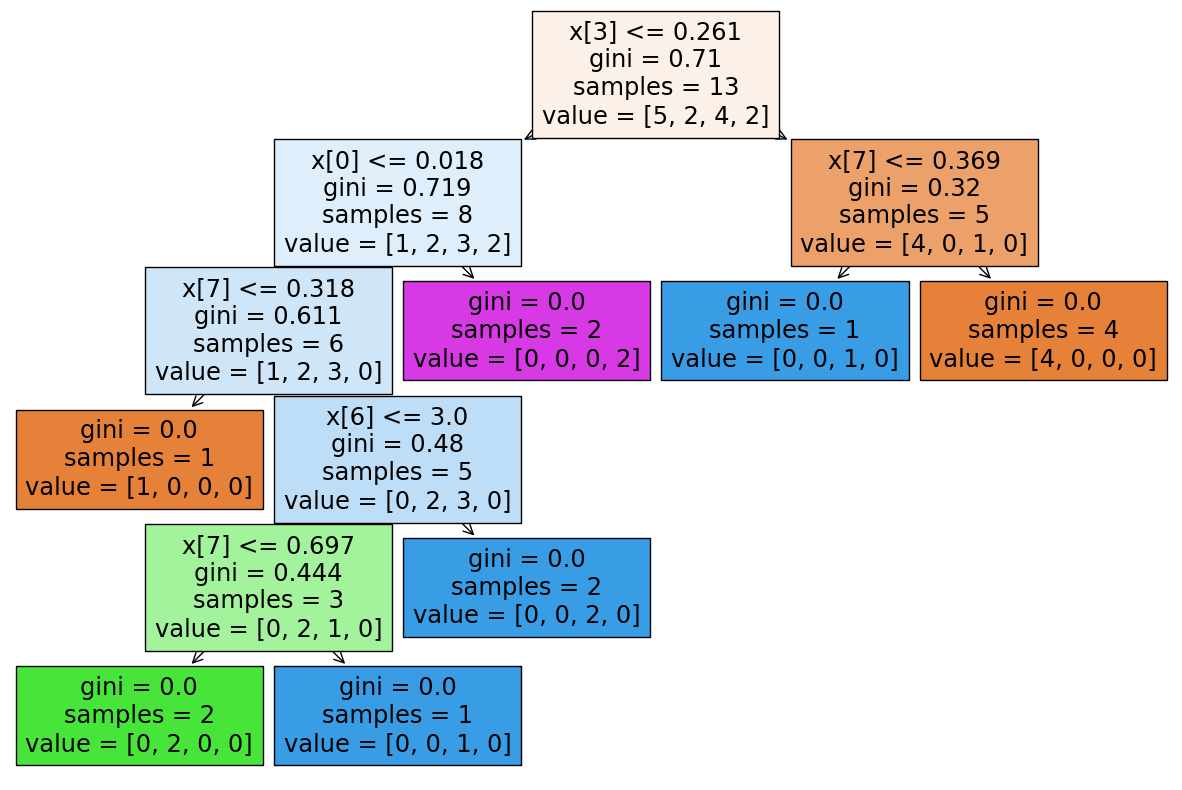

training accuracy: 1.0

test examples: [2. 3. 0. 2.]
test accuracy: 1.0


In [92]:
clf = DecisionTreeClassifier(random_state=np.random.randint(1000), max_depth=5)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")


$\verb|max_depth|=6$

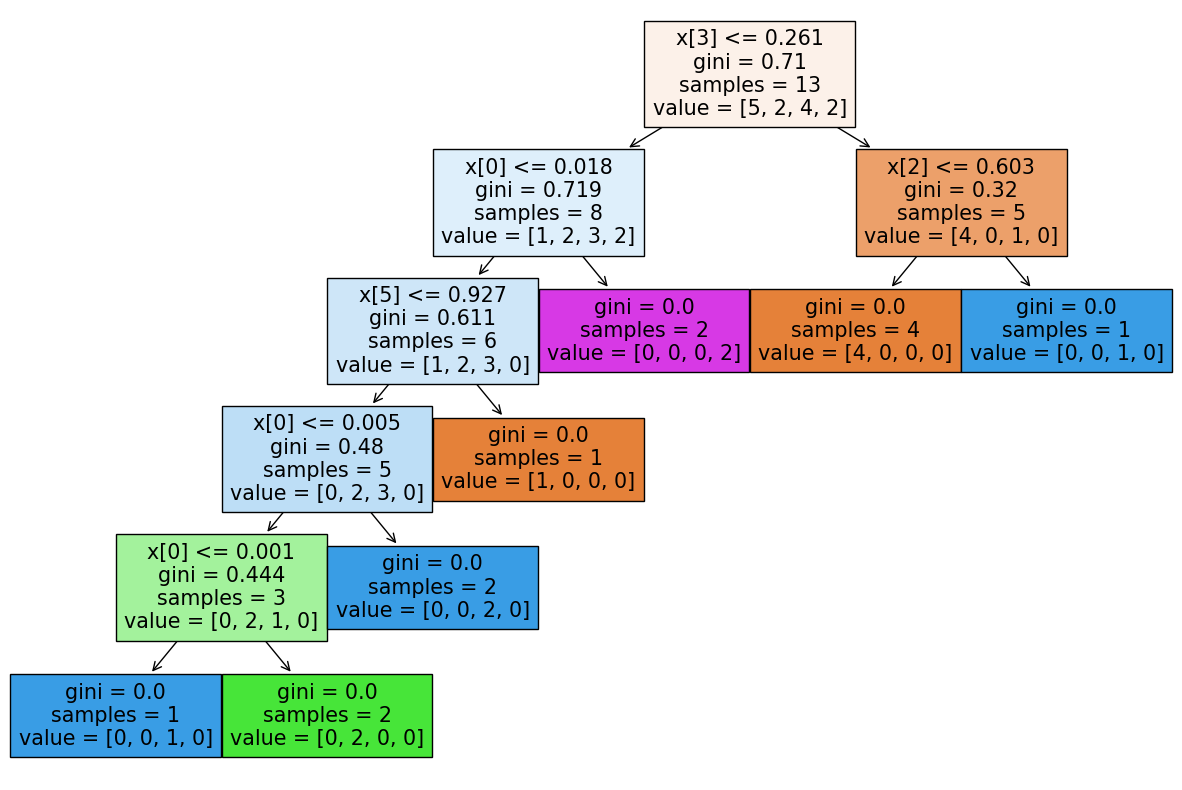

training accuracy: 1.0

test examples: [2. 3. 0. 2.]
test accuracy: 1.0


In [95]:
clf = DecisionTreeClassifier(random_state=np.random.randint(1000), max_depth=6)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

yPr = clf.predict(XTr)
print(f"training accuracy: {accuracy_score(yTr, yPr)}")
print()

yPr = clf.predict(XTe)
print(f"test examples: {yTe}")
print(f"test accuracy: {accuracy_score(yTe, yPr)}")


### Cross Validation

We use a small number of folds, 2-3, due to the little amount of data available

In [202]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

params = {
	'criterion': ['gini', 'entropy'],
	'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
}

cv_res = GridSearchCV(clf, params, cv=3, scoring='accuracy', verbose=1)
cv_res.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy', verbose=1)

In [203]:
cv_res.best_score_, cv_res.best_params_

(0.3, {'criterion': 'gini', 'max_depth': 3})

This is only slightly better than guessing, and with the given methodology, the decision tree architecture fails to build a metaclassifier.

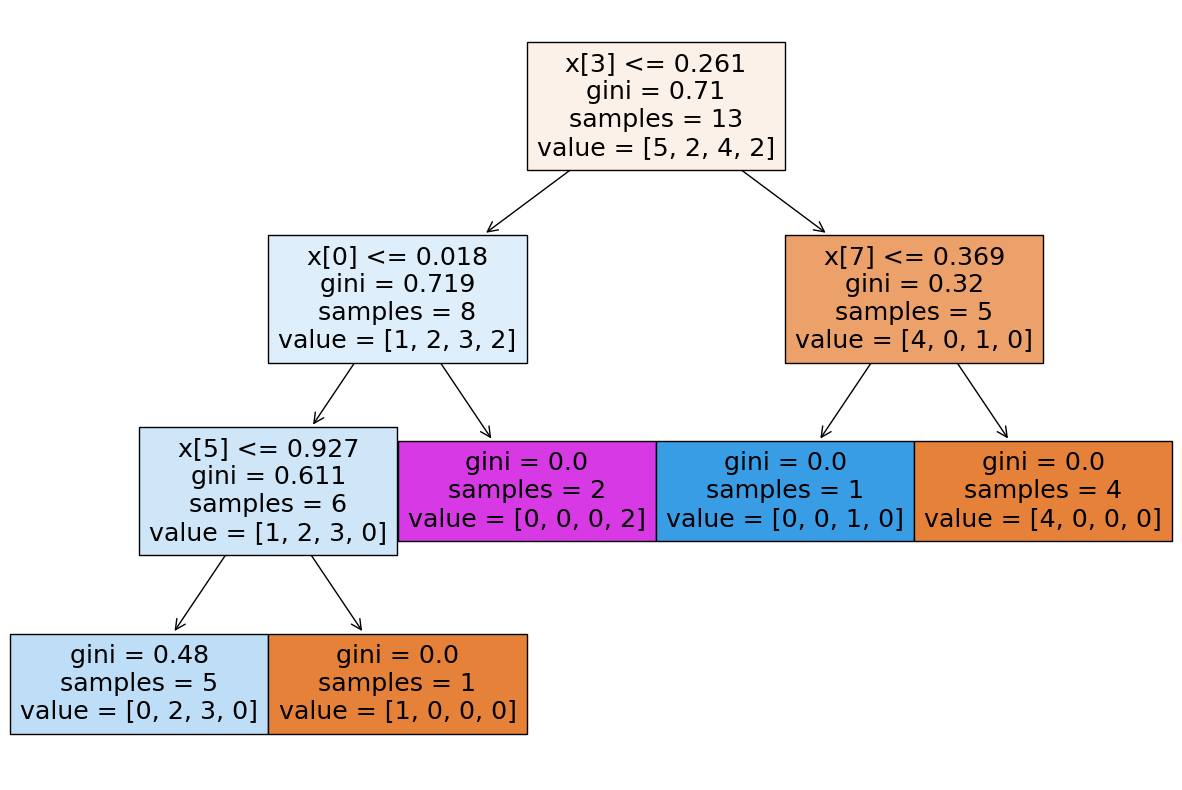

In [216]:
tr = cv_res.best_estimator_

plt.figure(figsize=(15, 10))
tree.plot_tree(tr, filled=True)
plt.show()

One important observation not made earlier, which is still maintained during the cross eval, is that the first split always seems to occur on the average correlation metafeature, where logistic regression seems to have an advantage on datasets w avg_corr > 0.24 (all but 1 such dataset has logi regression as the best classifier, and of all the datasets that logistic regression works best on, only one has a lower avg_corr than 0.24).

### Other Methods

In [246]:
from sklearn.linear_model import LogisticRegression

In [258]:
lr_clf = LogisticRegression(max_iter=1000)
lr_params = {
	'C': [0.01, 0.1, 1, 10, 100],
}

cv_res = GridSearchCV(lr_clf, lr_params, cv=3, scoring='accuracy', verbose=1)
cv_res.fit(X, y)

cv_res.best_score_, cv_res.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


(0.3833333333333333, {'C': 10})

Once again, this is barely better than choosing a class randomly (accuracy = 1/4 = 0.25), and it is safe to say that the given classes are not linearly separable. Since both Logistic Regression (a linear method) & Decision Trees (a non-linear method) fail on the dataset, we finally fall back on SVM & FFN classifiers.

In [270]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_params = {
	'C': [0.01, 0.1, 1, 10, 100],
	'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

cv_res = GridSearchCV(svc_clf, svc_params, cv=3, scoring='accuracy', verbose=1)
cv_res.fit(X, y)

cv_res.best_score_, cv_res.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


(0.3, {'C': 10, 'kernel': 'rbf'})

In [278]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=5000, hidden_layer_sizes = (24, 32))
mlp_params = {
	'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

cv_res = GridSearchCV(mlp_clf, mlp_params, cv=3, scoring='accuracy', verbose=1)
cv_res.fit(X, y)

cv_res.best_score_, cv_res.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


(0.3833333333333333, {'alpha': 0.001})

Finally, then, using this methodology (set of meta-features & limited dataset), we seem unable to build a satisfactory metaclassifier. In my opinion, this does not rule out the possibility of such a model, though such a model would require a much larger, and much more balanced dataset, picked carefully to act as a representative sample of datasets encountered in real world scenarios.